# Final Project - Fitness App

---
## Group Number 1
### Members:

- Amit Aslanov

- Efrat Atias

- Ofir Tzafrir
___

##### Link: https://www.kaggle.com/nithilaa/fitness-analysis
___

<div>
<img src="https://media.istockphoto.com/photos/various-sport-equipments-on-grass-picture-id949190756?k=6&m=949190756&s=612x612&w=0&h=dNek5l5xc68G0gCZv-fe0vHP8kjDpAYFrRnSPh8iLyc=" width="500"/>
</div>

1. [Introduction](#section1)  
2. [INSIGHT 1](#section2)
3. [INSIGHT 2](#section3)
4. [INSIGHT 3](#section4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/amitaslanov/fitness-app/main/fitness%20analysis.csv'
df = pd.read_csv(url)
df.columns = df.columns.str.replace('_','')
df.columns = df.columns.str.replace('Please select all that apply','')
df.columns = df.columns.str.replace('Please select all that applies','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')
df.columns = df.columns.str.replace('[^\w\s]', '')
df.columns = df.columns.str.strip()

C:\Users\2621~1\AppData\Local\Temp/ipykernel_14568/928555639.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(','')
C:\Users\2621~1\AppData\Local\Temp/ipykernel_14568/928555639.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')','')
C:\Users\2621~1\AppData\Local\Temp/ipykernel_14568/928555639.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^\w\s]', '')


In [2]:
df = df.rename(columns={'What forms of exercise do you currently participate in': 'exercise'})
df = df.rename(columns={'What barriers if any prevent you from exercising more regularly':'prevent_exercise'})
df = df.rename(columns={'Your name':'name'})
df = df.rename(columns={'Your age':'age'})
df = df.rename(columns={'What time if the day do you prefer to exercise':'time'})
df = df.rename(columns={'What time if the day do you prefer to exercise':'time'})
df = df.rename(columns={'How important is exercise to you':'motivation'})
df = df.rename(columns={'Do you exercise':'workout_way'})
df = df.rename(columns={'Your gender':'gender'})
df.head(2)

,Timestamp,name,gender,age,motivation,How do you describe your current level of fitness,How often do you exercise,prevent_exercise,exercise,workout_way,time,How long do you spend exercising per day,Would you say you eat a healthy balanced diet,What prevents you from eating a healthy balanced diet If any,How healthy do you consider yourself,Have you ever recommended your friends to follow a fitness routine,Have you ever purchased a fitness equipment,What motivates you to exercise
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...


<a id='section1'></a>

## 1. Introduction

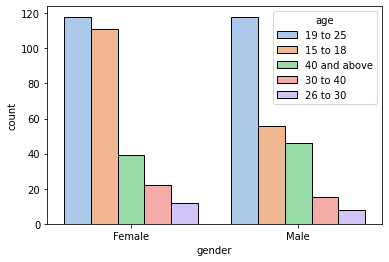

In [3]:
order=["Female","Male"]
sns.countplot(x="gender", hue="age" , data=df, palette="pastel", edgecolor = 'black' ,order = order)
plt.show()

All ages go by the same trend except the ages of 15-18.
In these ages we can see huge diffrence between females and males, probably because of the self image of young women. 

## The Connection Between The Age And Gender To Favorite Kind of Sport Exercise

#### First of all, we will separate the "exercise" column to 2 columns 

In [4]:
list_exs = df["exercise"].str.split(";", n = 2, expand = True)

In [5]:
df["exercise1"]= list_exs[0]
df["exercise2"]= list_exs[1]

In [6]:
df["id"] = df.index + 1
melted_df = pd.melt(df, id_vars=['id'], value_vars=['exercise1','exercise2'])

Now, we want to see the amount of favorite exercises between those people

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, "I don't really exercise"),
  Text(1, 0, 'Walking or jogging'),
  Text(2, 0, 'Gym'),
  Text(3, 0, 'Team sport'),
  Text(4, 0, 'Zumba dance'),
  Text(5, 0, 'Yoga'),
  Text(6, 0, 'Swimming'),
  Text(7, 0, 'Lifting weights')])

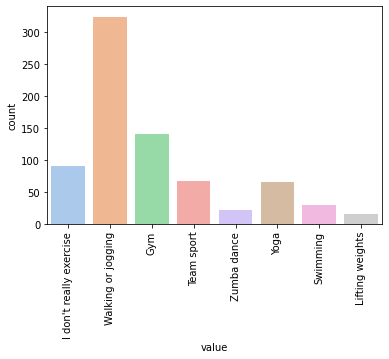

In [7]:
sns.countplot(data = melted_df, x = 'value', palette='pastel')
plt.xticks(rotation=90)

---
We can see that most favorite sport exercise is "Walking or jogging" 
___

In [8]:
df = df.replace({'exercise1' : { "I don't really exercise" : 1, 'Walking or jogging' : 2, 'Gym' : 3, 'Team sport': 4, 'Zumba dance': 5 , 'Yoga': 6, 'Swimming': 7, 'Lifting weights': 8}})
df = df.replace({'exercise2' : { "I don't really exercise" : 1, 'Walking or jogging' : 2, 'Gym' : 3, 'Team sport': 4, 'Zumba dance': 5 , 'Yoga': 6, 'Swimming': 7, 'Lifting weights': 8}})

#### Exercise dictionary:

- 1 - I don't really exersice
- 2 - Walking or jogging
- 3 - Gym
- 4 - Team sport
- 5 - Zumba dance
- 6 - Yoga
- 7 - Swimming
- 8 - Lifting weights

<AxesSubplot:xlabel='gender', ylabel='exercise2'>

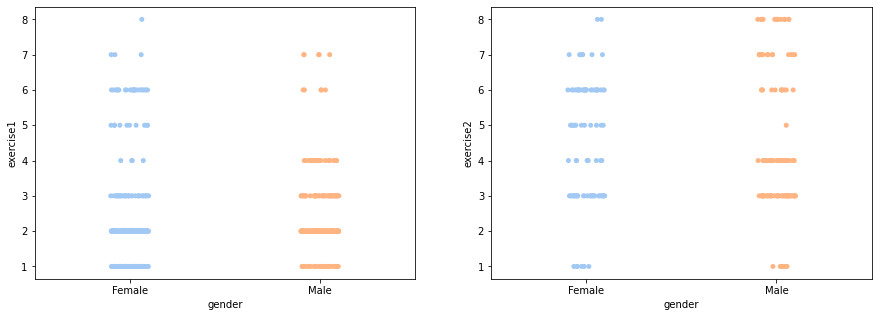

In [35]:
fig, axes = plt.subplots(figsize = (15, 5), ncols = 2)
sns.stripplot(x = "gender", y = "exercise1", data = df, palette = "pastel", ax = axes[0])
sns.stripplot(x = "gender", y = "exercise2", data = df, palette = "pastel", ax = axes[1])

---
#### Observation 1:
##### Connection between gender - exercise

- *For males*:

      The most common type of exercise for males is walking or jogging.
  
      In addition, only 1 male like to dance zumba.


- *For females*:

      The most common type of exercise for females is gym/yoga.

      In addition, they don't really like to lift weights.
___

#### Let's look at popularity of exercise types at males and females 
##### (we will take "exercise 1" column as example)

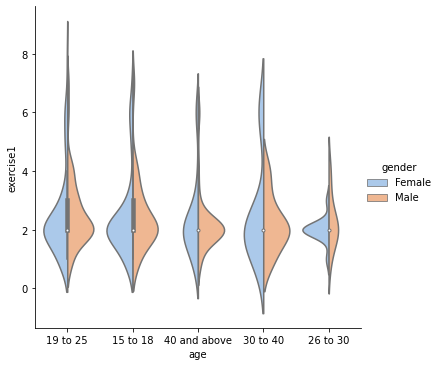

In [10]:
sns.catplot(x="age", y="exercise1", hue="gender",kind="violin", split=True, data=df, palette="pastel")

---
#### Observation 2:
##### Connection between age - gender - exercise

- *For males*:

      In ages 15-25 and above 30 - the most common type of exercise is walking or jogging.
      
      In ages 26-30 - they don't really like to do any kind of sport exercise.
      
- *For females*:

      At all ages females most common type of exercise is walking or jogging.
      and the least common type of exercise is swimming/liftting weights.
      
      At ages 30 and above, the spread over other types of exercise is greater.

<a id='section2'></a>

---
## What can we learn? - INSIGHT 1

* The favorite type of exercise is "walking or jogging" (for males at ages 15-26 or 30 and above  |  for females - 26-30)

* Males don't like to dance zumba  |  females don't like to lift weights.
___

## The Connection Between Traning Time And Gender To Motivation

#### First of all, we want to see what is the favorite time to exercise in general

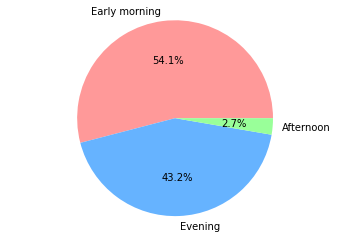

In [11]:
labels = ['Early morning', 'Evening','Afternoon']
sizes = [300,240,15]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)

ax.axis('equal')

plt.show()

---
We can see that most of the people prefer early morning tranings.
___

#### Let’s look at the preferred time by gender

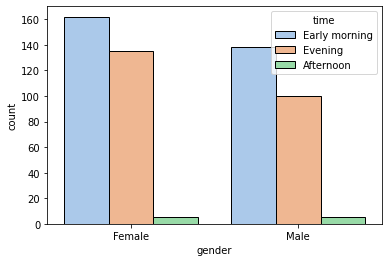

In [12]:
order=["Female","Male"]
sns.countplot(x="gender", hue="time" , data=df, palette="pastel", edgecolor = 'black' ,order = order)
plt.show()

#### Let's see the motivation in males and females

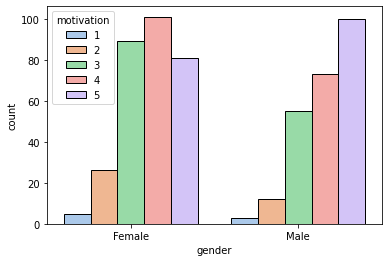

In [13]:
order=["Female","Male"]
sns.countplot(x="gender", hue="motivation" , data=df, palette="pastel", edgecolor = 'black' ,order = order)
plt.show()

---
High motivation is greater at males.
___

#### Now, we will observe the motivation level at males and females according their traning time

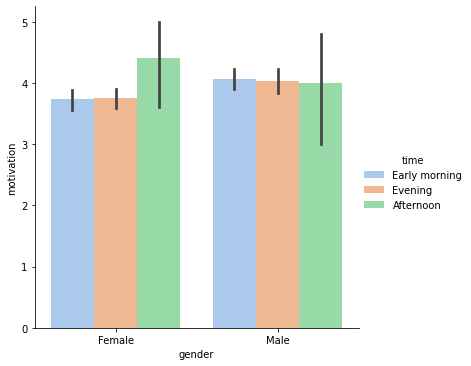

In [20]:
sns.catplot(x="gender", y="motivation", hue="time", kind="bar", data=df,  palette='pastel')

<a id='section3'></a>

---
## What can we learn? - INSIGHT 2

* Although in general males have higher motivation, the most motivated group is females who exercise afternoon
___

## The Connection Between Workout Way And Gender To Motivation

#### First of all, we want to see what is the most popular way of workout

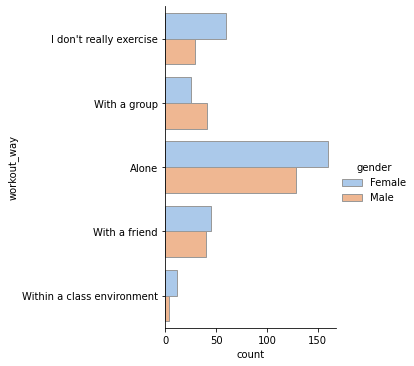

In [15]:
sns.catplot(y="workout_way", hue="gender", kind="count",palette="pastel", edgecolor=".6",data=df)

---
In both males and females most popular way of traning is alone.

The least popular way of traning is within a class enviromment.
___

#### We will examine the relationship between motivation and way of workout

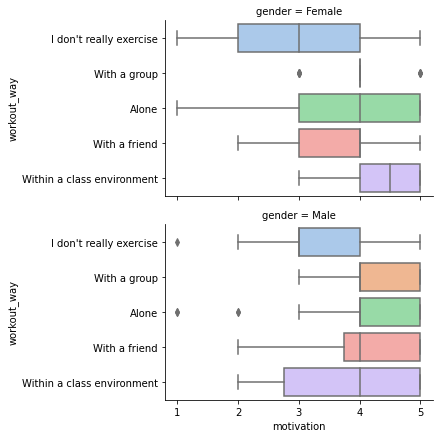

In [16]:
sns.catplot(x="motivation", y="workout_way", row="gender",kind="box", orient="h", height=3, aspect=2,data=df, palette='pastel')

---
- The highest motivation in females is mainly found in those who train within a class enviromment.
- The highest motivation in malse is mainly found in those who train with a group.
___

#### And now we will examine the relationship between age and way of workout

In [17]:
df = df.replace({'age' : { "15 to 18" : 1, '19 to 25' : 2, '26 to 30' : 3, '30 to 40':4, '40 and above':5 }})

#### Age dictionary:

- 1 - 15 to 18
- 2 - 19 to 25
- 3 - 26 to 30
- 4 - 31 to 40
- 5 - 40 and above

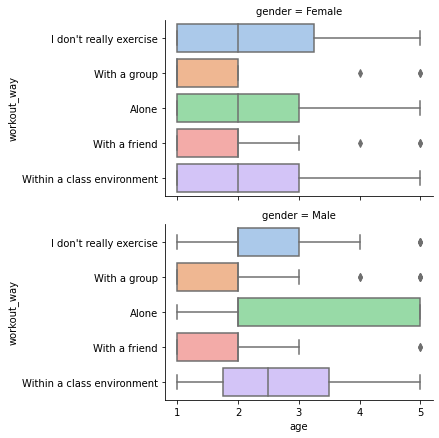

In [18]:
sns.catplot(x="age", y="workout_way", row="gender",kind="box", orient="h", height=3, aspect=2,data=df, palette='pastel')

<a id='section4'></a>

---
## What can we learn? - INSIGHT 3

* The highest motivation in females at a young age (up to age 26) is in group training and at an older age traning as a part of a class or alone.
* The highest motivation in males at a young age (up to age 26) is in training with a friend and in older age traning alone.
___